In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import os
import matplotlib.pyplot as plt
import calplot
from pandas.api.types import CategoricalDtype
import seaborn as sns
import plotly.express as px
import folium
import chardet
import geopandas as gpd
from geopandas.tools import geocode
import warnings
from geopy.geocoders import Nominatim

In [2]:
# Opening file

names = ["Dis No"]

#Natural_Disasters = pd.read_csv('NaturalDisastersv3.xlsx',names=names, lineterminator='\n', nrows=25882)
Natural_Disasters = pd.read_excel('NaturalDisasters.xlsx')

In [3]:
#there are also data for technological disasters so we are choosing Natural Disasters

Natural_Disasters = Natural_Disasters[Natural_Disasters['Disaster Group']=='Natural']

#there are some natural disasters that there are very few data
Natural_Disasters = Natural_Disasters[(Natural_Disasters['Disaster Subtype']!='Landslide')& (Natural_Disasters['Disaster Subtype']!='Tsunami') & (Natural_Disasters['Disaster Subtype']!='Mudslide')&(Natural_Disasters['Disaster Subtype']!='Ground movement')&(Natural_Disasters['Disaster Subtype']!='Lava flow')& (Natural_Disasters['Disaster Subtype']!='Rockfall')& (Natural_Disasters['Disaster Subtype']!='Grasshopper')& (Natural_Disasters['Disaster Subtype']!='Locust')& (Natural_Disasters['Disaster Subtype']!='Worms')& (Natural_Disasters['Disaster Subtype']!='Subsidence')
                    & (Natural_Disasters['Disaster Subtype']!='Ash fall')]
print( pd.unique(Natural_Disasters['Disaster Subtype'].values))
# & (Natural_Disasters['Disaster Subtype']!='Tsunami') & (Natural_Disasters['Disaster Subtype']!='Mudslide')&(Natural_Disasters['Disaster Subtype']!='Ground movement')]



#cols=["year","month","day"]
#df['date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")


['Drought' 'Tropical cyclone' nan 'Bacterial disease' 'Avalanche'
 'Forest fire' 'Riverine flood' 'Convective storm' 'Viral disease'
 'Heat wave' 'Land fire (Brush, Bush, Pasture)' 'Coastal flood'
 'Cold wave' 'Flash flood' 'Parasitic disease' 'Severe winter conditions'
 'Extra-tropical storm' 'Pyroclastic flow']


## Part that is not important at all

In [4]:
ISO_to_Region = Natural_Disasters[['ISO','Region']].drop_duplicates(subset=['ISO', 'Region'])
ISO_to_Region = ISO_to_Region.set_index('ISO')['Region'].to_dict()
ISO_to_Region

{'CPV': 'Western Africa',
 'IND': 'Southern Asia',
 'BGD': 'Southern Asia',
 'BEL': 'Western Europe',
 'HKG': 'Eastern Asia',
 'CHN': 'Eastern Asia',
 'HTI': 'Caribbean',
 'IDN': 'South-Eastern Asia',
 'BFA': 'Western Africa',
 'CAN': 'Northern America',
 'GMB': 'Western Africa',
 'GNB': 'Western Africa',
 'AIA': 'Caribbean',
 'DFR': 'Western Europe',
 'BHS': 'Caribbean',
 'CUB': 'Caribbean',
 'DZA': 'Northern Africa',
 'GLP': 'Caribbean',
 'DMA': 'Caribbean',
 'DOM': 'Caribbean',
 'FRA': 'Western Europe',
 'GRC': 'Southern Europe',
 'BLZ': 'Central America',
 'FJI': 'Melanesia',
 'HND': 'Central America',
 'AUS': 'Australia and New Zealand',
 'COK': 'Polynesia',
 'AZO': 'Southern Europe',
 'EGY': 'Northern Africa',
 'BMU': 'Northern America',
 'BRA': 'South America',
 'GTM': 'Central America',
 'ATG': 'Caribbean',
 'ECU': 'South America',
 'CHE': 'Western Europe',
 'COM': 'Eastern Africa',
 'AUT': 'Western Europe',
 'GBR': 'Northern Europe',
 'ESP': 'Southern Europe',
 'ANT': 'Caribbe

In [5]:
Disasters_Filtered = Natural_Disasters[(Natural_Disasters['Country']=='India')
                                      |(Natural_Disasters['Country']=='United States of America (the)')
                                      |(Natural_Disasters['ISO']=='RUS')
                                      |(Natural_Disasters['Country']=='Australia')
                                      |(Natural_Disasters['ISO']=='BRA')
                                      |(Natural_Disasters['ISO']=='CHN')
                                      |(Natural_Disasters['ISO']=='IDN')
                                      |(Natural_Disasters['ISO']=='MEX')]

print( pd.unique(Disasters_Filtered['Country'].values))
print( pd.unique(Natural_Disasters['Country'].values))


['India' 'China' 'Indonesia' 'Australia' 'Brazil'
 'United States of America (the)' 'Mexico' 'Russian Federation (the)']
['Cabo Verde' 'India' 'Bangladesh' 'Belgium' 'Hong Kong' 'China' 'Haiti'
 'Indonesia' 'Burkina Faso' 'Canada' 'Gambia (the)' 'Guinea-Bissau'
 'Anguilla' 'Germany Fed Rep' 'Bahamas (the)' 'Cuba' 'Algeria'
 'Guadeloupe' 'Dominica' 'Dominican Republic (the)' 'France' 'Greece'
 'Belize' 'Fiji' 'Honduras' 'Australia' 'Cook Islands (the)'
 'Azores Islands' 'Egypt' 'Bermuda' 'Brazil' 'Guatemala'
 'Antigua and Barbuda' 'Ecuador' 'Switzerland' 'Comoros (the)' 'Austria'
 'United Kingdom of Great Britain and Northern Ireland (the)' 'Spain'
 'Netherlands Antilles' 'Barbados' 'Afghanistan' 'Argentina' 'Colombia'
 'Guam' 'Grenada' 'Bulgaria' 'Bolivia (Plurinational State of)' 'Botswana'
 'Chile' 'Ethiopia' 'American Samoa' 'Ghana' 'Benin' 'Costa Rica' 'Cyprus'
 'Côte d’Ivoire' 'Hungary' 'Cameroon' 'Guyana' 'Central African Republic'
 'Czechoslovakia' 'Denmark' 'Djibouti' 'Burundi'

In [6]:
# Not a comment Disasters_Filtered

# Filtering disasters before and after 2000 

Disaster_Country_After_2000= Disasters_Filtered[(Disasters_Filtered['Year'] > 2000)&(Disasters_Filtered['Year'] < 2022)].groupby(['ISO','Disaster Subtype','Year'])['Dis No'].count().reset_index()
Disaster_Country_After_2000_pivoted = Disaster_Country_After_2000.pivot(index=['ISO','Year'], columns='Disaster Subtype', values = 'Dis No')

In [7]:
filtered = Disaster_Country_After_2000_pivoted.fillna(0)
filtered = filtered.reset_index()
filtered['Region'] = filtered['ISO'].map(ISO_to_Region)

In [8]:

Disaster_Region_After_2000= Disasters_Filtered[(Disasters_Filtered['Year'] > 2000)&(Disasters_Filtered['Year'] < 2023)].groupby(['Region','Disaster Subtype','Year'])['Dis No'].count().reset_index()
Disaster_Region_After_2000_pivoted = Disaster_Region_After_2000.pivot(index=['Region','Year'], columns='Disaster Subtype', values = 'Dis No')

In [9]:
Regions_filtered = Disaster_Region_After_2000_pivoted.reset_index()
Regions_filtered = Regions_filtered.fillna(0)
Regions_filtered = Regions_filtered.reset_index()

In [10]:
print(Natural_Disasters.columns)

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'AID Contribution ('000 US$)', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damages ('000 US$)', 'Insured Damages, Adjusted ('000 US$)',
       'Total Damages ('000 US$)', 'Total Damages, Adjusted ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')


### Checking the month and day data of the dataset

In [88]:


NND = Natural_Disasters[['Dis No','Year', 'Country', 'Location', 'Origin', 'Associated Dis', 'Associated Dis2',
       'Disaster Subtype','Disaster Subsubtype','Start Year', 'Start Month', 'Start Day','End Year', 'End Month', 'End Day','Total Deaths','Total Affected',"Total Damages ('000 US$)",]]

NaN = NND[(~NND['End Month'].isna())&(~NND['Start Month'].isna())&(NND['End Month']!=NND['Start Month'])&(NND['Year']<2000)].groupby('Disaster Subtype').count()

print(NaN['Dis No'])
NaN = NND[(~NND['End Month'].isna())&(~NND['Start Month'].isna())&(NND['End Month']==NND['Start Month'])&(NND['Year']<1980)].groupby('Disaster Subtype').count()

#print(NaN['Dis No'])
NND.groupby('Disaster Subtype').count()['Dis No']

Disaster Subtype
Avalanche                             4
Bacterial disease                    55
Coastal flood                         9
Cold wave                             6
Convective storm                      7
Drought                              41
Flash flood                          16
Forest fire                          14
Heat wave                             7
Land fire (Brush, Bush, Pasture)      2
Parasitic disease                     3
Riverine flood                      114
Tropical cyclone                     35
Viral disease                        26
Name: Dis No, dtype: int64


Disaster Subtype
Avalanche                            122
Bacterial disease                    778
Coastal flood                         85
Cold wave                            310
Convective storm                    1165
Drought                              800
Extra-tropical storm                 148
Flash flood                          818
Forest fire                          314
Heat wave                            228
Land fire (Brush, Bush, Pasture)      92
Parasitic disease                     51
Pyroclastic flow                       4
Riverine flood                      2657
Severe winter conditions              77
Tropical cyclone                    2471
Viral disease                        543
Name: Dis No, dtype: int64

### Checking the origin data

In [14]:
Disasters_with_origin = NND.dropna(subset = ['Origin'])
Disasters_with_origin

,Dis No,Year,Country,Location,Origin,Associated Dis,Associated Dis2,Disaster Subtype,Disaster Subsubtype,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths
528,1960-9039-HKG,1960,Hong Kong,NaN,Late arrival of rain,NaN,NaN,Drought,NaN,1960,1.0,NaN,1960,NaN,NaN,NaN
984,1975-0154-CHN,1975,China,Henan province,Typhoon,Broken Dam/Burst bank,NaN,NaN,NaN,1975,4.0,NaN,1975,4.0,NaN,20000.0
1123,1977-0084-FRA,1977,France,Gers (South West),Heavy rains,NaN,NaN,Riverine flood,NaN,1977,7.0,8.0,1977,7.0,8.0,26.0
1219,1909-0017-USA,1909,United States of America (the),Louisiana,Meteorological,NaN,NaN,Coastal flood,NaN,1909,9.0,22.0,1909,9.0,22.0,72.0
1504,1953-0007-NLD,1953,Netherlands (the),"Zeeland, South Holland and North Brabant .larg...",Storm and wave surge,Broken Dam/Burst bank,NaN,Coastal flood,NaN,1953,1.0,31.0,1953,1.0,31.0,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25860,2023-0046-NZL,2023,New Zealand,"Kelston, Albany, Randwick Park, Mangere, Wells...",Heavy rains,NaN,NaN,NaN,NaN,2023,1.0,27.0,2023,1.0,30.0,4.0
25865,2023-0102-PHL,2023,Philippines (the),Davao City (Davao del Norte); Davao Oriental (...,Heavy rains,NaN,NaN,NaN,NaN,2023,2.0,20.0,2023,2.0,24.0,2.0
25878,2023-0080-ZAF,2023,South Africa,"Mpumalanga, the Eastern Cape, Gauteng, KwaZulu...",Heavy rains,NaN,NaN,NaN,NaN,2023,2.0,8.0,2023,2.0,21.0,17.0
25879,2023-0110-ZMB,2023,Zambia,"Namwala, Monze and Mazabuka districts",Heavy rains,NaN,NaN,Flash flood,NaN,2023,2.0,7.0,2023,2.0,9.0,NaN


In [15]:
print(pd.unique(Disasters_with_origin['Origin'].values))

['Late arrival of rain' 'Typhoon' 'Heavy rains' 'Meteorological'
 'Storm and wave surge' 'Heavy rain' 'Brief torrential rains' 'Famine'
 'El Nino' 'Extra-tropical cyclone' 'Brief torrential rain'
 'Heavy rains and thunderstorms' 'Monsoonal rain' 'Monssonal rain'
 'Hevay rain' 'Monsoon rain' 'Tropical cyclone' 'Drought period'
 'Prolonged drought' 'Monsoon rains'
 'Volcanic activity, tropical rainstorms and ash from the eruptions'
 'monsoonal rain' 'Heavy rain and Snowmelt' 'Snowmelt and Heavy rains'
 'Rain, snowmelt' 'Earthquake' 'Snowmelt' 'Typhoon Gali' 'Mosoonal rain'
 'Heavy rain and brief torrential rain'
 'Breakdown water supply, poor hygiene practices and increase of number of displaced perdons'
 'Flood' 'Heavy rains, melting snow' 'Continous rainfall'
 'Snow storm and heavy winds' 'Rain and snowmelt' 'Lack rainfall'
 'Food consumed' 'El Nino phenomenom'
 'butchering of cattle which died of sudden illness and consumption of meat and other tissues'
 'poor sanitation, lack of safe

### Checking the Associated disaster

In [16]:
print(pd.unique(Disasters_with_origin['Associated Dis'].values))

[nan 'Broken Dam/Burst bank' 'Epidemic' 'Slide (land, mud, snow, rock)'
 'Rain' 'Pollution' 'Tsunami/Tidal wave' 'Flood' 'Wildfire' 'Fire'
 'Crop failure' 'Heat wave' 'Cold wave' 'Food shortage' 'Hail'
 'Transport accident' 'Famine' 'Explosion' 'Lightening' 'Water shortage'
 'Industrial accidents' 'Storm' 'Avalanche (Snow, Debris)' 'Collapse'
 'Snow/ice']


In [17]:
NND = Natural_Disasters[['Year', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Disaster Subtype','Disaster Subsubtype','Start Year', 'Start Month', 'Start Day','Total Deaths']]
NND

,Year,Country,ISO,Region,Continent,Location,Disaster Subtype,Disaster Subsubtype,Start Year,Start Month,Start Day,Total Deaths
0,1900,Cabo Verde,CPV,Western Africa,Africa,Countrywide,Drought,NaN,1900,NaN,NaN,11000.0
1,1900,India,IND,Southern Asia,Asia,Bengal,Drought,NaN,1900,NaN,NaN,1250000.0
10,1904,Bangladesh,BGD,Southern Asia,Asia,Chittagong,Tropical cyclone,NaN,1904,11.0,NaN,NaN
16,1906,Belgium,BEL,Western Europe,Europe,Louvain region,NaN,NaN,1906,5.0,14.0,6.0
17,1906,Belgium,BEL,Western Europe,Europe,NaN,NaN,NaN,1906,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
25876,2023,United States of America (the),USA,Northern America,Americas,Alabama and Georgia,Convective storm,Tornado,2023,1.0,12.0,11.0
25878,2023,South Africa,ZAF,Southern Africa,Africa,"Mpumalanga, the Eastern Cape, Gauteng, KwaZulu...",NaN,NaN,2023,2.0,8.0,17.0
25879,2023,Zambia,ZMB,Eastern Africa,Africa,"Namwala, Monze and Mazabuka districts",Flash flood,NaN,2023,2.0,7.0,NaN
25880,2023,Zambia,ZMB,Eastern Africa,Africa,"Chikoma, Mbande, Mzigawa, Chipanji, Mlawe, Eas...",Bacterial disease,NaN,2023,1.0,21.0,2.0


In [18]:
Natural_Disasters

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900-9002-CPV,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.849084,NaN,NaN,NaN,NaN
1,1900-9001-IND,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.849084,NaN,NaN,NaN,NaN
10,1904-0003-BGD,1904,3,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.077011,NaN,NaN,NaN,NaN
16,1906-0023-BEL,1906,23,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.077011,NaN,NaN,NaN,NaN
17,1906-0024-BEL,1906,24,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.077011,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25876,2023-0032-USA,2023,32,NaN,Natural,Meteorological,Storm,Convective storm,Tornado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,3214;3224,NaN,"Alabama, Georgia (Adm1)."
25878,2023-0080-ZAF,2023,80,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,2708;77310;77311;77312;77313;77314;77315,NaN,"Eastern Cape, Gauteng, KwaZulu-Natal, Limpopo,..."
25879,2023-0110-ZMB,2023,110,NaN,Natural,Hydrological,Flood,Flash flood,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,65234;65235;65236,"Mazabuka, Monze, Namwala (Adm2)."
25880,2023-0068-ZMB,2023,68,EP-2023-000013,Natural,Biological,Epidemic,Bacterial disease,NaN,Cholera,...,NaN,NaN,NaN,NaN,NaN,NaN,1,3428;3429;3430;3433,NaN,"Eastern, Luapula, Lusaka, Southern (Adm1)."


In [19]:
Categories = NND['Disaster Subtype'].value_counts()
len(Categories)

17

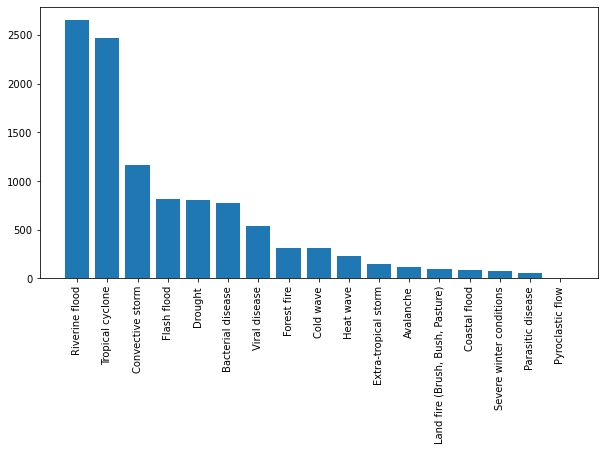

In [20]:

plt.figure(figsize = (10,5))

plt.bar(Categories.index,Categories.values)
plt.xticks(rotation=90)
plt.show()

In [21]:
Categories = NND['Disaster Subsubtype'].dropna().value_counts()
Categories

Tornado                    289
Severe storm               252
Winter storm/Blizzard      228
Lightning/Thunderstorms    186
Hail                       109
Sand/Dust storm             19
Storm/Surge                  7
Derecho                      6
Snow/Ice                     6
Name: Disaster Subsubtype, dtype: int64

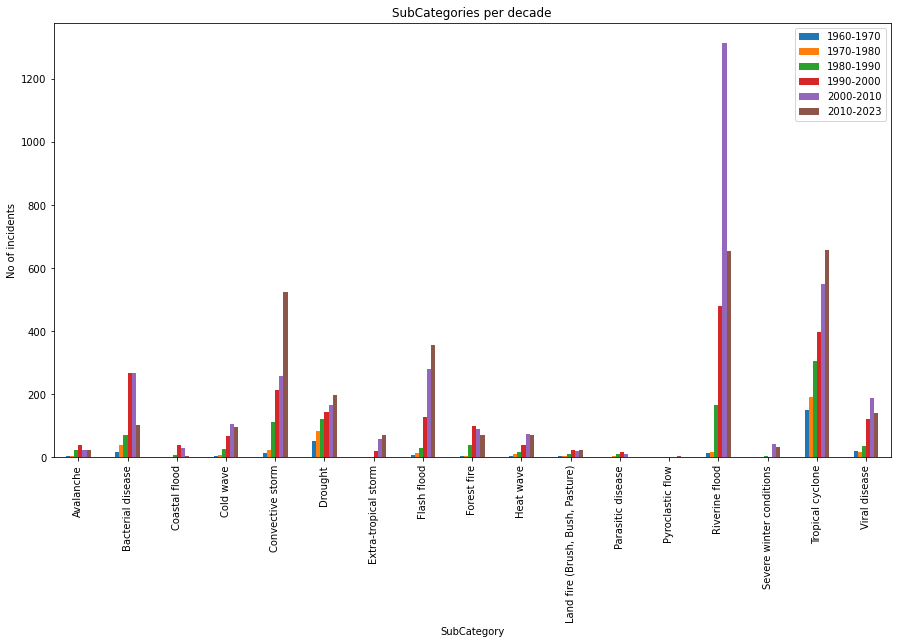

In [22]:
Categories = {'1960-1970':NND[(NND['Year'] > 1960) & (NND['Year'] <= 1970)]['Disaster Subtype'].value_counts(),
              '1970-1980':NND[(NND['Year'] > 1970) & (NND['Year'] <= 1980)]['Disaster Subtype'].value_counts(),
              '1980-1990':NND[(NND['Year'] > 1980) & (NND['Year'] <= 1990)]['Disaster Subtype'].value_counts(),
             '1990-2000':NND[(NND['Year'] > 1990) & (NND['Year'] <= 2000)]['Disaster Subtype'].value_counts(),
             '2000-2010':NND[(NND['Year'] > 2000) & (NND['Year'] <= 2010)]['Disaster Subtype'].value_counts(),
             '2010-2023':NND[(NND['Year'] > 2010) & (NND['Year'] <= 2023)]['Disaster Subtype'].value_counts()}
Categories_Years= pd.DataFrame(Categories)

fig, ax = plt.subplots(figsize=(15, 8))
Categories_Years.plot(kind='bar', rot=90, ax=ax)
plt.title('SubCategories per decade')
plt.xlabel('SubCategory')
plt.ylabel('No of incidents')
plt.show()



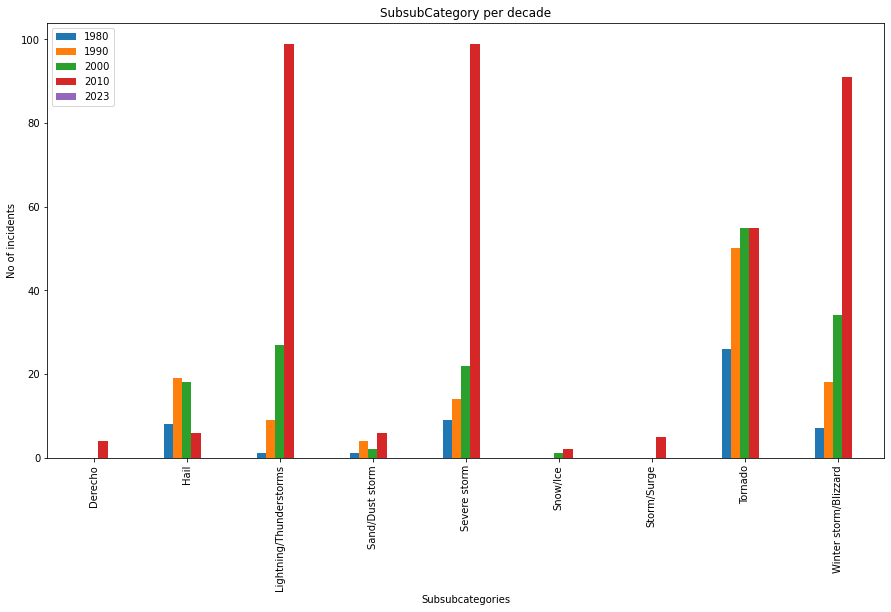

In [23]:
Categories = NND['Disaster Subsubtype'].dropna().value_counts()
Categories


Categories = {'1980':NND[(NND['Year'] > 1980) & (NND['Year'] <= 1990)].dropna()['Disaster Subsubtype'].value_counts(),
             '1990':NND[(NND['Year'] > 1990) & (NND['Year'] <= 2000)].dropna()['Disaster Subsubtype'].value_counts(),
             '2000':NND[(NND['Year'] > 2000) & (NND['Year'] <= 2010)].dropna()['Disaster Subsubtype'].value_counts(),
             '2010':NND[(NND['Year'] > 2010) & (NND['Year'] <= 2023)].dropna()['Disaster Subsubtype'].value_counts(),
             '2023':{}}
Categories_Years= pd.DataFrame(Categories)

fig, ax = plt.subplots(figsize=(15, 8))
Categories_Years.plot(kind='bar', rot=90, ax=ax)
plt.title('SubsubCategory per decade')
plt.xlabel('Subsubcategories')
plt.ylabel('No of incidents')
plt.show()

### Try to find a way to determine the location of a soecific natural disaster

In [24]:
location_name = 'Chikoma'
country = 'ZMB'

# geocode the location using geopandas
geolocator = Nominatim(user_agent='natural_disaster_analysis')
location = geolocator.geocode('1600 Pennsylvania Avenue NW, Washington, DC 20500')

# extract the latitude and longitude from the result
latitude = location.latitude
longitude = location.longitude

print(f'The latitude and longitude of {location_name} in {country} are ({latitude}, {longitude}).')

The latitude and longitude of Chikoma in ZMB are (38.897699700000004, -77.03655315).


In [25]:
Disaster_Country= Natural_Disasters.groupby(['ISO','Disaster Subtype'])['Dis No'].count().reset_index()
Disaster_Country_Before_1980= Natural_Disasters[Natural_Disasters['Year'] <=2000].groupby(['ISO','Disaster Subtype'])['Dis No'].count().reset_index()
Disaster_Country_After_1980= Natural_Disasters[Natural_Disasters['Year'] > 2000].groupby(['ISO','Disaster Subtype'])['Dis No'].count().reset_index()
Disaster_Country_Year= Natural_Disasters.groupby(['ISO','Disaster Subtype','Year'])['Dis No'].count()


In [26]:
# when we use group by the parameters of the call are used as an index 
# by using reset_index we ensure that the indexes become again columns

Disaster_Country = Disaster_Country.reset_index()

In [27]:
Droughts = Disaster_Country[Disaster_Country['Disaster Subtype']=='Drought']
Droughts = Disaster_Country_Before_1980[Disaster_Country['Disaster Subtype']=='Drought']


<ipython-input-27-a6c421cc11cd>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Droughts = Disaster_Country_Before_1980[Disaster_Country['Disaster Subtype']=='Drought']


In [64]:
# a function that gets the type of disaster and the colour to be used as input and pro


def mapping(DF_After = Disaster_Country_After_1980 , DF_Before = Disaster_Country_Before_1980, subtype = 'Drought',colour = 'YlOrRd',Value = 'Dis No' ):
    """
        A function that gets the subtype of a disaster and the colour to be used as input and plots it in two maps before 
        and after 2000 using in both map as maximum, the maximum of both of them
    
    
    """
    
    maximum_After = DF_After[DF_After['Disaster Subtype']==subtype][Value].max()
    
    maximum_Before = DF_Before[DF_Before['Disaster Subtype']==subtype][Value].max()
    
    maximum = max(maximum_After,maximum_Before)
    
    
    Droughts =  DF_Before[ DF_Before['Disaster Subtype']==subtype]

    fig = px.choropleth(Droughts, locations='ISO', color=Value,
                    scope='world', projection='natural earth', color_continuous_scale = 'YlOrRd',range_color=[0, maximum])
    
    fig.update_layout(
    title={
        'text': 'Number of '+subtype + 's before 2000',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
    )
    
    fig.show()

    Droughts = DF_After[DF_After['Disaster Subtype']==subtype]


    fig = px.choropleth(Droughts, locations='ISO', color=Value,
                    scope='world', projection='natural earth',color_continuous_scale ='YlOrRd',range_color=[0, maximum])
    
        
    fig.update_layout(
    title={
        'text': 'Number of '+subtype + 's after 2000',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
    )
    
    fig.show()


    
mapping()

In [37]:
mapping(subtype= 'Riverine flood')

In [38]:
mapping(subtype= 'Flash flood')

In [31]:
mapping(subtype= 'Tropical cyclone')

In [43]:
mapping(subtype='Heat wave')

In [45]:
mapping(subtype='Cold wave')

In [46]:
mapping(subtype='Forest fire')

In [47]:
mapping(subtype='Bacterial disease')

In [48]:
mapping(subtype='Viral disease')

# Affected poeple

## Total Deaths

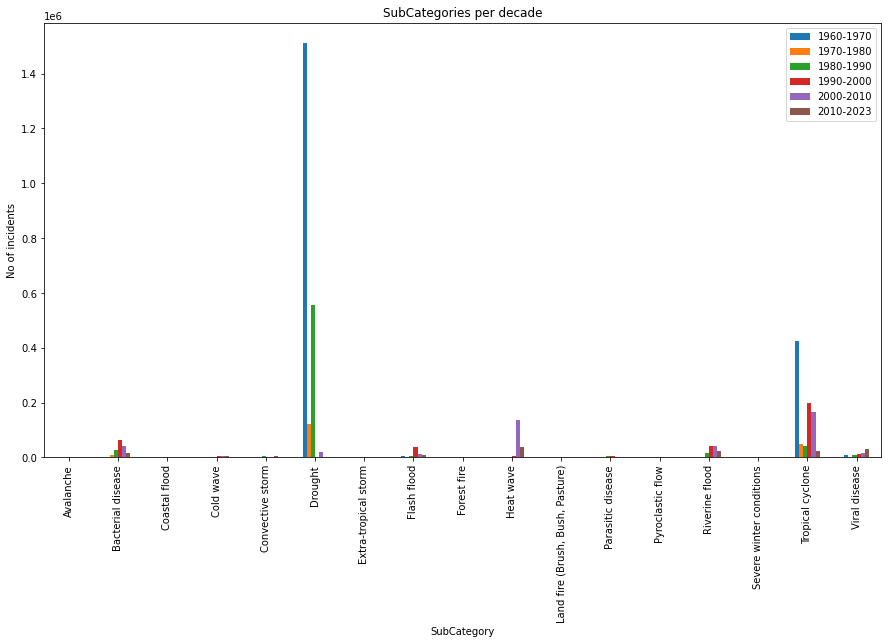

In [53]:
Categories = {'1960-1970':NND[(NND['Year'] > 1960) & (NND['Year'] <= 1970)].groupby('Disaster Subtype')['Total Deaths'].sum(),
              '1970-1980':NND[(NND['Year'] > 1970) & (NND['Year'] <= 1980)].groupby('Disaster Subtype')['Total Deaths'].sum(),
              '1980-1990':NND[(NND['Year'] > 1980) & (NND['Year'] <= 1990)].groupby('Disaster Subtype')['Total Deaths'].sum(),
             '1990-2000':NND[(NND['Year'] > 1990) & (NND['Year'] <= 2000)].groupby('Disaster Subtype')['Total Deaths'].sum(),
             '2000-2010':NND[(NND['Year'] > 2000) & (NND['Year'] <= 2010)].groupby('Disaster Subtype')['Total Deaths'].sum(),
             '2010-2023':NND[(NND['Year'] > 2010) & (NND['Year'] <= 2023)].groupby('Disaster Subtype')['Total Deaths'].sum()}
Categories_Years= pd.DataFrame(Categories)

fig, ax = plt.subplots(figsize=(15, 8))
Categories_Years.plot(kind='bar', rot=90, ax=ax)
plt.title('SubCategories per decade')
plt.xlabel('SubCategory')
plt.ylabel('No of incidents')
plt.show()

### Total Deaths without Droughts

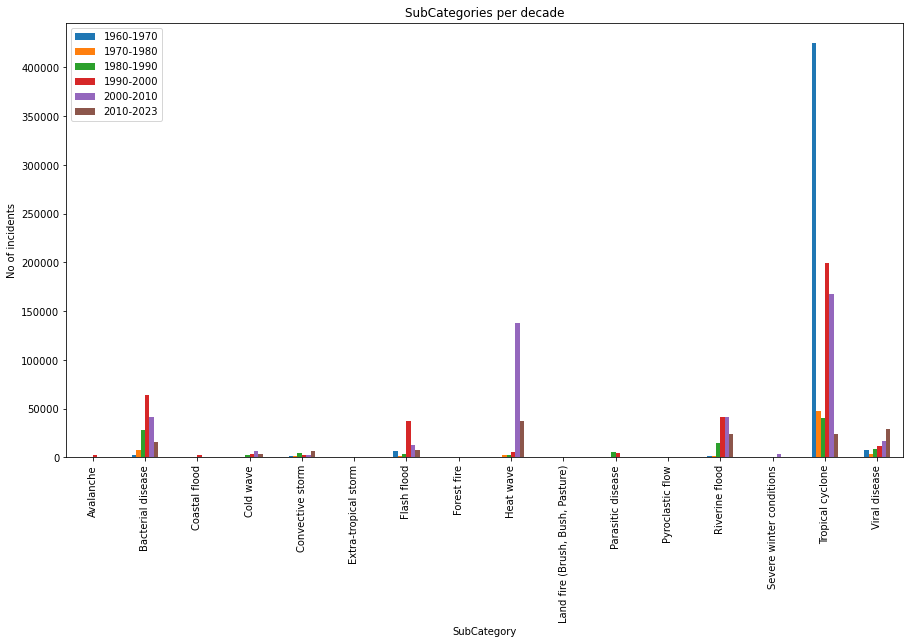

In [55]:
Categories = {'1960-1970':NND[(NND['Year'] > 1960) & (NND['Year'] <= 1970)& (NND['Disaster Subtype'] != 'Drought')].groupby('Disaster Subtype')['Total Deaths'].sum(),
              '1970-1980':NND[(NND['Year'] > 1970) & (NND['Year'] <= 1980)& (NND['Disaster Subtype'] != 'Drought')].groupby('Disaster Subtype')['Total Deaths'].sum(),
              '1980-1990':NND[(NND['Year'] > 1980) & (NND['Year'] <= 1990)& (NND['Disaster Subtype'] != 'Drought')].groupby('Disaster Subtype')['Total Deaths'].sum(),
             '1990-2000':NND[(NND['Year'] > 1990) & (NND['Year'] <= 2000)& (NND['Disaster Subtype'] != 'Drought')].groupby('Disaster Subtype')['Total Deaths'].sum(),
             '2000-2010':NND[(NND['Year'] > 2000) & (NND['Year'] <= 2010)& (NND['Disaster Subtype'] != 'Drought')].groupby('Disaster Subtype')['Total Deaths'].sum(),
             '2010-2023':NND[(NND['Year'] > 2010) & (NND['Year'] <= 2023)& (NND['Disaster Subtype'] != 'Drought')].groupby('Disaster Subtype')['Total Deaths'].sum()}
Categories_Years= pd.DataFrame(Categories)

fig, ax = plt.subplots(figsize=(15, 8))
Categories_Years.plot(kind='bar', rot=90, ax=ax)
plt.title('SubCategories per decade')
plt.xlabel('SubCategory')
plt.ylabel('No of incidents')
plt.show()

In [61]:
Disaster_Country_Deaths= Natural_Disasters.groupby(['ISO','Disaster Subtype'])['Total Deaths'].sum().reset_index()
Disaster_Country_Deaths_Before_2000= Natural_Disasters[Natural_Disasters['Year'] <=2000].groupby(['ISO','Disaster Subtype'])['Total Deaths'].sum().reset_index()
Disaster_Country_Deaths_After_2000= Natural_Disasters[Natural_Disasters['Year'] > 2000].groupby(['ISO','Disaster Subtype'])['Total Deaths'].sum().reset_index()
Disaster_Country_Deaths_Year= Natural_Disasters.groupby(['ISO','Disaster Subtype','Year'])['Total Deaths'].sum()

In [63]:
Disaster_Country_Deaths_Before_2000

,ISO,Disaster Subtype,Total Deaths
0,AFG,Avalanche,340.0
1,AFG,Bacterial disease,192.0
2,AFG,Cold wave,224.0
3,AFG,Drought,37.0
4,AFG,Flash flood,480.0
...,...,...,...
917,ZMB,Viral disease,136.0
918,ZWE,Bacterial disease,444.0
919,ZWE,Drought,0.0
920,ZWE,Parasitic disease,1311.0


In [65]:
mapping(DF_After = Disaster_Country_Deaths_After_2000 , DF_Before = Disaster_Country_Deaths_Before_2000, subtype = 'Drought', Value = 'Total Deaths' )

In [66]:
mapping(DF_After = Disaster_Country_Deaths_After_2000 , DF_Before = Disaster_Country_Deaths_Before_2000, subtype = 'Tropical cyclone', Value = 'Total Deaths' )

In [67]:
mapping(DF_After = Disaster_Country_Deaths_After_2000 , DF_Before = Disaster_Country_Deaths_Before_2000, subtype = 'Bacterial disease', Value = 'Total Deaths' )

In [68]:
mapping(DF_After = Disaster_Country_Deaths_After_2000 , DF_Before = Disaster_Country_Deaths_Before_2000, subtype = 'Viral disease', Value = 'Total Deaths' )

In [72]:
mapping(DF_After = Disaster_Country_Deaths_After_2000 , DF_Before = Disaster_Country_Deaths_Before_2000, subtype = 'Heat wave', Value = 'Total Deaths' )

In [73]:
mapping(DF_After = Disaster_Country_Deaths_After_2000 , DF_Before = Disaster_Country_Deaths_Before_2000, subtype = 'Cold wave', Value = 'Total Deaths' )

In [74]:
mapping(DF_After = Disaster_Country_Deaths_After_2000 , DF_Before = Disaster_Country_Deaths_Before_2000, subtype = 'Flash flood', Value = 'Total Deaths' )

In [75]:
mapping(DF_After = Disaster_Country_Deaths_After_2000 , DF_Before = Disaster_Country_Deaths_Before_2000, subtype = 'Riverine flood', Value = 'Total Deaths' )

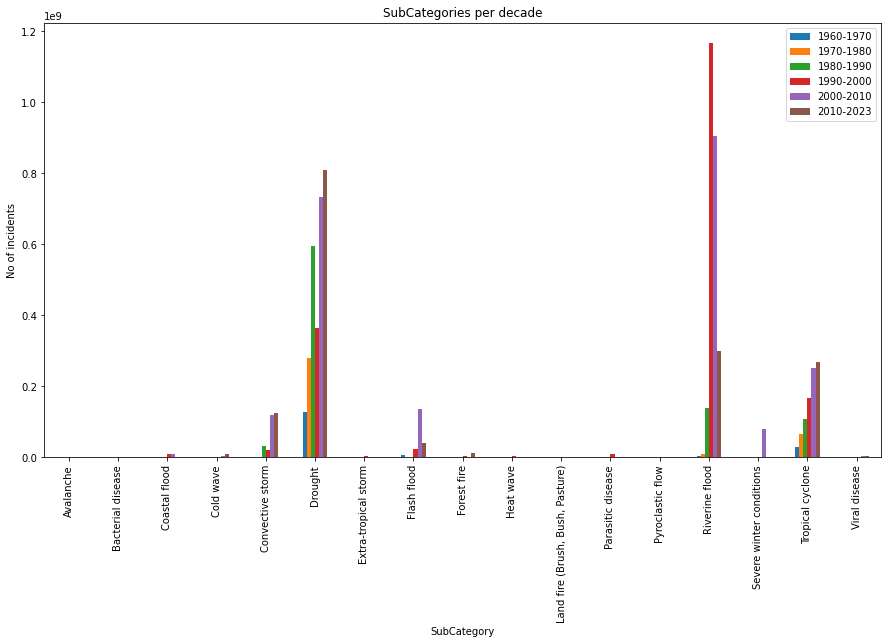

In [52]:
Categories = {'1960-1970':NND[(NND['Year'] > 1960) & (NND['Year'] <= 1970)].groupby('Disaster Subtype')['Total Affected'].sum(),
              '1970-1980':NND[(NND['Year'] > 1970) & (NND['Year'] <= 1980)].groupby('Disaster Subtype')['Total Affected'].sum(),
              '1980-1990':NND[(NND['Year'] > 1980) & (NND['Year'] <= 1990)].groupby('Disaster Subtype')['Total Affected'].sum(),
             '1990-2000':NND[(NND['Year'] > 1990) & (NND['Year'] <= 2000)].groupby('Disaster Subtype')['Total Affected'].sum(),
             '2000-2010':NND[(NND['Year'] > 2000) & (NND['Year'] <= 2010)].groupby('Disaster Subtype')['Total Affected'].sum(),
             '2010-2023':NND[(NND['Year'] > 2010) & (NND['Year'] <= 2023)].groupby('Disaster Subtype')['Total Affected'].sum()}
Categories_Years= pd.DataFrame(Categories)

fig, ax = plt.subplots(figsize=(15, 8))
Categories_Years.plot(kind='bar', rot=90, ax=ax)
plt.title('SubCategories per decade')
plt.xlabel('SubCategory')
plt.ylabel('No of incidents')
plt.show()


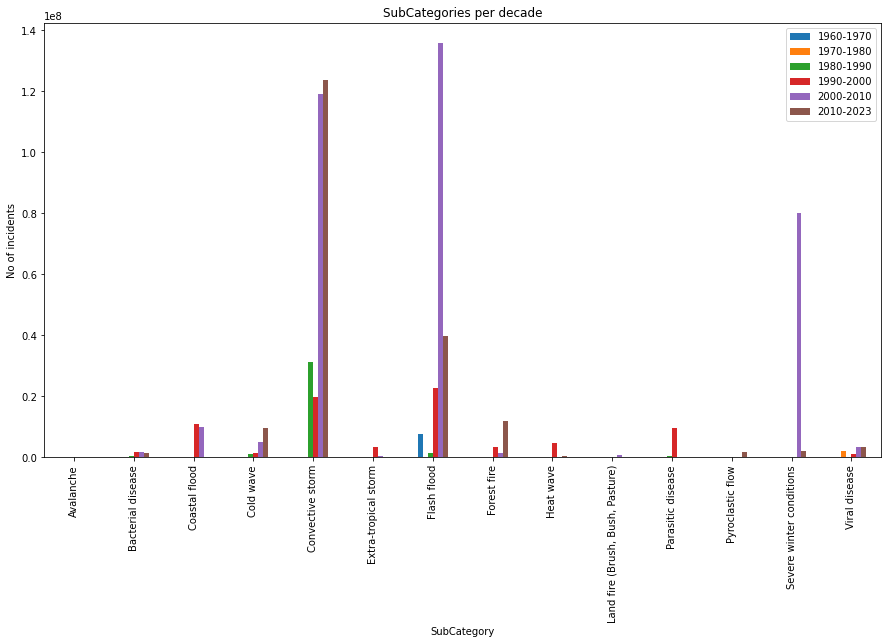

In [79]:
Categories = {'1960-1970':NND[(NND['Year'] > 1960) & (NND['Year'] <= 1970)& (NND['Disaster Subtype'] != 'Drought')& (NND['Disaster Subtype'] != 'Riverine flood')& (NND['Disaster Subtype'] != 'Tropical cyclone')].groupby('Disaster Subtype')['Total Affected'].sum(),
              '1970-1980':NND[(NND['Year'] > 1970) & (NND['Year'] <= 1980)& (NND['Disaster Subtype'] != 'Drought')& (NND['Disaster Subtype'] != 'Riverine flood')& (NND['Disaster Subtype'] != 'Tropical cyclone')].groupby('Disaster Subtype')['Total Affected'].sum(),
              '1980-1990':NND[(NND['Year'] > 1980) & (NND['Year'] <= 1990)& (NND['Disaster Subtype'] != 'Drought')& (NND['Disaster Subtype'] != 'Riverine flood')& (NND['Disaster Subtype'] != 'Tropical cyclone')].groupby('Disaster Subtype')['Total Affected'].sum(),
             '1990-2000':NND[(NND['Year'] > 1990) & (NND['Year'] <= 2000)& (NND['Disaster Subtype'] != 'Drought')& (NND['Disaster Subtype'] != 'Riverine flood')& (NND['Disaster Subtype'] != 'Tropical cyclone')].groupby('Disaster Subtype')['Total Affected'].sum(),
             '2000-2010':NND[(NND['Year'] > 2000) & (NND['Year'] <= 2010)& (NND['Disaster Subtype'] != 'Drought')& (NND['Disaster Subtype'] != 'Riverine flood')& (NND['Disaster Subtype'] != 'Tropical cyclone')].groupby('Disaster Subtype')['Total Affected'].sum(),
             '2010-2023':NND[(NND['Year'] > 2010) & (NND['Year'] <= 2023)& (NND['Disaster Subtype'] != 'Drought')& (NND['Disaster Subtype'] != 'Riverine flood')& (NND['Disaster Subtype'] != 'Tropical cyclone')].groupby('Disaster Subtype')['Total Affected'].sum()}
Categories_Years= pd.DataFrame(Categories)

fig, ax = plt.subplots(figsize=(15, 8))
Categories_Years.plot(kind='bar', rot=90, ax=ax)
plt.title('SubCategories per decade')
plt.xlabel('SubCategory')
plt.ylabel('No of incidents')
plt.show()

In [81]:
Disaster_Country_Affected= Natural_Disasters.groupby(['ISO','Disaster Subtype'])['Total Affected'].sum().reset_index()
Disaster_Country_Affected_Before_2000= Natural_Disasters[Natural_Disasters['Year'] <=2000].groupby(['ISO','Disaster Subtype'])['Total Affected'].sum().reset_index()
Disaster_Country_Affected_After_2000= Natural_Disasters[Natural_Disasters['Year'] > 2000].groupby(['ISO','Disaster Subtype'])['Total Affected'].sum().reset_index()
Disaster_Country_Affected_Year= Natural_Disasters.groupby(['ISO','Disaster Subtype','Year'])['Total Affected'].sum()

In [83]:
mapping(DF_After = Disaster_Country_Affected_After_2000 , DF_Before = Disaster_Country_Affected_Before_2000, subtype = 'Drought', Value = 'Total Affected' )

In [84]:
mapping(DF_After = Disaster_Country_Affected_After_2000 , DF_Before = Disaster_Country_Affected_Before_2000, subtype = 'Tropical cyclone', Value = 'Total Affected' )

In [85]:
mapping(DF_After = Disaster_Country_Affected_After_2000 , DF_Before = Disaster_Country_Affected_Before_2000, subtype = 'Bacterial disease', Value = 'Total Affected' )

In [86]:
mapping(DF_After = Disaster_Country_Affected_After_2000 , DF_Before = Disaster_Country_Affected_Before_2000, subtype = 'Viral disease', Value = 'Total Affected' )

'Drought' 'Tropical cyclone' nan 'Bacterial disease' 'Avalanche'
 'Forest fire' 'Riverine flood' 'Convective storm' 'Viral disease'
 'Heat wave' 'Land fire (Brush, Bush, Pasture)' 'Coastal flood'
 'Cold wave' 'Flash flood' 'Parasitic disease' 'Severe winter conditions'
 'Extra-tropical storm' 'Pyroclastic flow'

## Total Damage in thousands of dollars

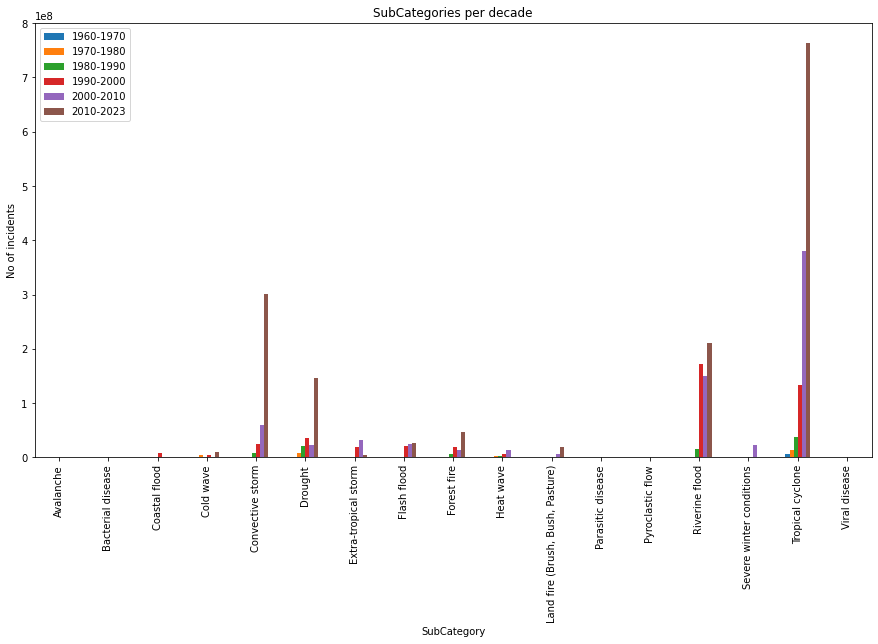

In [89]:
Categories = {'1960-1970':NND[(NND['Year'] > 1960) & (NND['Year'] <= 1970)].groupby('Disaster Subtype')["Total Damages ('000 US$)"].sum(),
              '1970-1980':NND[(NND['Year'] > 1970) & (NND['Year'] <= 1980)].groupby('Disaster Subtype')["Total Damages ('000 US$)"].sum(),
              '1980-1990':NND[(NND['Year'] > 1980) & (NND['Year'] <= 1990)].groupby('Disaster Subtype')["Total Damages ('000 US$)"].sum(),
             '1990-2000':NND[(NND['Year'] > 1990) & (NND['Year'] <= 2000)].groupby('Disaster Subtype')["Total Damages ('000 US$)"].sum(),
             '2000-2010':NND[(NND['Year'] > 2000) & (NND['Year'] <= 2010)].groupby('Disaster Subtype')["Total Damages ('000 US$)"].sum(),
             '2010-2023':NND[(NND['Year'] > 2010) & (NND['Year'] <= 2023)].groupby('Disaster Subtype')["Total Damages ('000 US$)"].sum()}
Categories_Years= pd.DataFrame(Categories)

fig, ax = plt.subplots(figsize=(15, 8))
Categories_Years.plot(kind='bar', rot=90, ax=ax)
plt.title('SubCategories per decade')
plt.xlabel('SubCategory')
plt.ylabel('No of incidents')
plt.show()


In [90]:
Disaster_Country_Damage= Natural_Disasters.groupby(['ISO','Disaster Subtype'])["Total Damages ('000 US$)"].sum().reset_index()
Disaster_Country_Damage_Before_2000= Natural_Disasters[Natural_Disasters['Year'] <=2000].groupby(['ISO','Disaster Subtype'])["Total Damages ('000 US$)"].sum().reset_index()
Disaster_Country_Damage_After_2000= Natural_Disasters[Natural_Disasters['Year'] > 2000].groupby(['ISO','Disaster Subtype'])["Total Damages ('000 US$)"].sum().reset_index()
Disaster_Country_Damage_Year= Natural_Disasters.groupby(['ISO','Disaster Subtype','Year'])["Total Damages ('000 US$)"].sum()

In [91]:
mapping(DF_After = Disaster_Country_Damage_After_2000 , DF_Before = Disaster_Country_Damage_Before_2000, subtype = 'Viral disease', Value = "Total Damages ('000 US$)" )

In [92]:
mapping(DF_After = Disaster_Country_Damage_After_2000 , DF_Before = Disaster_Country_Damage_Before_2000, subtype = 'Drought', Value = "Total Damages ('000 US$)" )

In [93]:
mapping(DF_After = Disaster_Country_Damage_After_2000 , DF_Before = Disaster_Country_Damage_Before_2000, subtype = 'Tropical cyclone', Value = "Total Damages ('000 US$)" )

In [94]:
mapping(DF_After = Disaster_Country_Damage_After_2000 , DF_Before = Disaster_Country_Damage_Before_2000, subtype = 'Forest fire', Value = "Total Damages ('000 US$)" )

'Drought' 'Tropical cyclone' nan 'Bacterial disease' 'Avalanche'
 'Forest fire' 'Riverine flood' 'Convective storm' 'Viral disease'
 'Heat wave' 'Land fire (Brush, Bush, Pasture)' 'Coastal flood'
 'Cold wave' 'Flash flood' 'Parasitic disease' 'Severe winter conditions'
 'Extra-tropical storm' 'Pyroclastic flow'